# Цифра

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

**Цель проекта:**

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Изучение данных

#### Библиотеки

In [ ]:
# Импортируем библиотеки pandas
import numpy as np
import pandas as pd
import seaborn as sns

# И все используемое далее
from matplotlib import pyplot as plt
from numpy.random import RandomState
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, make_scorer 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor


# Отключаем лишние предупреждения
import warnings
warnings.filterwarnings('ignore')

#### Функции

Все функции используемые в проекте тут:

##### column_differences

In [ ]:
class gold_recovery:
    
    def column_differences(self, df1, df2):
        '''
        Функция находит отличия по столбцам между df1 и df2
        и выводит список столбцов имеющиеся только в df1
        '''
        df1_columns = df1.columns
        df2_columns = df2.columns
        differences = df1_columns.difference(df2_columns)
        counter = 0
        print('========== Отличающиеся столбцы ==========\n')
        for i in differences:
            counter += 1
            print("{}. {}".format(counter,i))
        if counter == 0:
            print('Отсутствуют!')
        print('\nКоличество столбцов в df1:', len(df1_columns))
        print('Количество столбцов в df2:', len(df2_columns))
        print('Общее количество отличающихся столбцов: ', counter)


##### column_values

In [ ]:
def column_values(data_frame):
    '''
    Функция для визуального поиска артефактов и выбросов в значениях DataFrame
    '''
    for column in data_frame.columns:
        print('\nЗначения столбца', column,':')
        print(data_frame[column].sort_values().unique())

##### df_info

In [ ]:
def df_info(data_frame):
    '''
    Функция выводящая первичную информацию о DataFrame
    '''
    print('\nРазмер таблицы: {} '.format(data_frame.shape))
    print('\nИнфо:')
    print(data_frame.info())                                            # сколько значений и в каком формате
    print('\nПропусков:')
    print(data_frame.isna().mean().sort_values(ascending=False) * 100)  # подсчёт пропусков в процентах
    print('\ndescribe:')
    display(data_frame.describe())                                      # вдруг чего "на глазок" проявится 
    print('\nДубликатов =', data_frame.duplicated().sum())              # проверим дубликаты

##### drop_0_from_column

In [ ]:
def drop_0_from_column(data_frame, column):
    '''
    Функция удаляет "0" в заданном столбце
    '''
    data_frame = data_frame.drop(data_frame[data_frame[column] == 0].index)
    print(data_frame[data_frame[column] == 0].shape)

##### final_smape

In [ ]:
'''def final_smape(model_1, model_2, 
                features1, target1, 
                features2, target2, 
                params):
    
    Функция для анализа модели и расчета итогового sMape
    ''' '''
    score = make_scorer(smape)
    grid_1= GridSearchCV(model_1, 
                         params, 
                         scoring=score, 
                         cv=5, 
                         n_jobs = -1)                                   # кроссвалидация для rougher
    grid_1.fit(features1, target1)
    smape_1 = (-1) * grid_1.best_score_
    print('\nsMAPE rougher: {:.2f}%'. format(smape_1))
    print('Лучшие параметры rougher:', grid_1.best_params_)
    grid_2= GridSearchCV(model_2, 
                         params, 
                         scoring=score, 
                         cv=5, 
                         n_jobs = -1)                                   # кроссвалидация для final
    grid_2.fit(features2, target2)
    smape_2 = (-1) * grid_2.best_score_
    print('\nsMAPE final: {:.2f}%'. format(smape_2))
    print('Лучшие параметры final:', grid_2.best_params_)
    smape_final = 0.25*smape_1 + 0.75*smape_2                       # расчет итогового sMAPE
    print ('\nИтоговое sMAPE: {:.2f}%\n'. format(smape_final))
    
    '''
    
def final_smape(model_1, model_2, 
                features1, target1, 
                features2, target2, 
                params):
    '''
    Функция для анализа модели и расчета итогового sMape
    '''
    score = make_scorer(smape, greater_is_better = False)
    grid_1= GridSearchCV(model_1, 
                         params, 
                         scoring=score, 
                         cv=5, 
                         n_jobs = -1)                                   # кроссвалидация для rougher
    grid_1.fit(features1, target1)
    smape_1 = (-1) * grid_1.best_score_
    print('\nsMAPE rougher: {:.2f}%'. format(smape_1))
    print('Лучшие параметры rougher:', grid_1.best_params_)
    grid_2= GridSearchCV(model_2, 
                         params, 
                         scoring=score, 
                         cv=5, 
                         n_jobs = -1)                                   # кроссвалидация для final
    grid_2.fit(features2, target2)
    smape_2 = (-1) * grid_2.best_score_
    print('\nsMAPE final: {:.2f}%'. format(smape_2))
    print('Лучшие параметры final:', grid_2.best_params_)
    smape_final = 0.25*smape_1 + 0.75*smape_2                       # расчет итогового sMAPE
    print ('\nИтоговое sMAPE: {:.2f}%\n'. format(smape_final))
    

##### print_plot и print_bar_metal

In [ ]:
def print_plot(df,stage):
    '''
    1.1. Вывод диаграммы среднего количетсва металлов на каждом этапе обработки
    '''
    print()
    df.plot(kind = 'bar')
    plt.title('Среднее содержание металла на каждом этапе (в '+ stage +')')
    plt.xlabel('Этап обработки')
    plt.ylabel('средняя концентрация металла')
    plt.xticks(np.arange(4), df['steps'])
    plt.rc('axes', titlesize=16)
    plt.rc('axes', labelsize=10)
    plt.xticks(rotation = 30)
    plt.show()
def print_bar_metal(data):
    '''
    1.2. Вывод диаграммы среднего количетсва металлов на каждом этапе обработки
    '''
    processing_step = ['rougher.input',
                       'rougher.output',
                       'primary_cleaner.output',
                       'final.output']
    df_concentrate = pd.DataFrame({'steps':processing_step})
    df_tail = pd.DataFrame({'steps':processing_step})
    for metal in metals:
        data_means_concentrate = [data['rougher.input.feed_' + metal[0]].mean(),
                                  data['rougher.output.concentrate_' + metal[0]].mean(),
                                  data['primary_cleaner.output.concentrate_' + metal[0]].mean(),
                                  data['final.output.concentrate_' + metal[0]].mean()] 
        data_means_tail = [data['rougher.input.feed_' + metal[0]].mean(),
                           data['rougher.output.tail_' + metal[0]].mean(),
                           data['primary_cleaner.output.tail_' + metal[0]].mean(),
                           data['final.output.tail_' + metal[0]].mean()]
        df_concentrate[metal] = data_means_concentrate
        df_tail[metal] = data_means_tail
    print_plot(df_concentrate,'чистом концентрате')
    print_plot(df_tail,'отвальных хвостах')

##### smape

In [ ]:
def smape(target, predict):
    '''
    Функция расчета метрики качества sMAPE 
    (симметричное среднее абсолютное процентное отклонение)
    '''
    smape = (-1) * ((1/len(target)) * 
             sum(2 * abs(target - predict) / 
                 (abs(target) + abs(predict)))) * 100
    return smape

In [ ]:
gr = gold_recovery()

In [ ]:
# Читаем файл с данными и сохраняем в df.

try:
    df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv',
                           index_col='date',  # Столбец 'date' убираем в индекс. Пригодится в работе.
                           parse_dates=['date'])
except:
    ! gdown --id 1SAlACtg21CTotDMQkIufa2vUSv3u8cUF
    df_train = pd.read_csv('/content/gold_recovery_train_new.csv',
                           index_col='date',
                           parse_dates=['date'])

In [ ]:
try:
    df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv',
                          index_col='date', 
                          parse_dates=['date'])
except:
    ! gdown --id 13w3HIq7AMv48LtsklcJqDkGFZnAukpVH
    df_test = pd.read_csv('/content/gold_recovery_test_new.csv',
                          index_col='date', 
                          parse_dates=['date'])

In [ ]:
try:
    df_full= pd.read_csv('/datasets/gold_recovery_full_new.csv',
                         index_col='date',
                         parse_dates=['date'])
except:
    ! gdown --id 1M5iEZf4bvgP0Rzw2KpviwG2kWIoKbdlN
    df_full = pd.read_csv('/content/gold_recovery_full_new.csv',
                          index_col='date',
                          parse_dates=['date'])

#### Таблица df_train

In [ ]:
# Задаем длинну циферок так, чтобы все пропуски значений видны были
pd.set_option('display.float_format', '{:,.5f}'.format)

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

# Смотрим таблички
display(df_train.columns)
print()
display(df_train)

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.05540,9.88965,5.50732,42.19202,70.54122,10.41196,0.89545,16.90430,2.14315,127.09200,10.12829,7.25000,0.98876,8.54755,10.38965,19.52930,34.17443,14.93653,2.53491,7.47607,2.10668,"1,549.77576",-498.91214,"1,551.43420",-516.40344,"1,549.87390",-498.66660,"1,554.36743",-493.42813,"41,885.70703","3,481.77905","3,520.33716",2.83869,6.10038,2.28491,523.54633,55.48660,36.80859,6.48615,11.98662,6.00799,11.83674,6.00582,11.50077,7.10107,28.02930,19.79381,87.10776,5.00802,0.50873,19.15430,1.17024,999.70691,-404.06699,"1,603.01135",-434.71503,"1,602.37500",-442.20447,"1,598.93726",-451.29413,"1,404.47205",-455.46298,"1,416.35498",-451.93964,14.50018,4.69482,8.76465,2.60618,25.85311,-498.52649,23.89366,-501.40628,23.96180,-495.26282,21.94041,-499.34097,14.01684,-502.48801,12.09993,-504.71594,9.92563,-498.31021,8.07967,-500.47098,14.15134,-605.84198
2016-01-15 01:00:00,6.02937,9.96894,5.25778,42.70163,69.26620,10.46268,0.92745,16.63451,2.22493,125.62923,10.29625,7

#### Таблица df_test

In [ ]:
display(df_test.columns)
print()
display(df_test)

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.80091,14.99312,8.08000,1.00502,"1,398.98130",-500.22558,"1,399.14493",-499.91973,"1,400.10300",-500.70437,"1,399.00170",-499.48514,13.12857,5.63671,489.79365,62.71045,42.02244,12.08410,16.92288,6.15348,16.86752,6.15071,"1,001.84932",-350.30127,"1,249.73861",-399.10753,"1,249.75052",-399.39673,"1,198.28786",-399.48859,999.47225,-399.53096,949.56619,-398.18081,24.93820,-500.49096,14.94761,-500.01384,20.01817,-450.39600,13.98706,-449.83151,12.02355,-497.79583,8.01666,-501.28914,7.94656,-432.31785,4.87251,-500.03744,26.70589,-499.70941
2016-09-01 01:59:59,215.39245,14.98747,8.08000,0.99047,"1,398.77791",-500.05743,"1,398.05536",-499.77818,"1,396.15103",-499.24017,"1,399.50809",-500.41632,13.03628,5.52607,490.10453,61.96116,41.18790,11.91898,17.00253,5.99904,16.99606,6.00231,998.69078,-350.42570,"1,248.39546",-399.94603,"1,249.51445",-399.63081,"1,200.50646",-399.94243,"1,000.00211",-399.49153,950.20001,-405.78751,24.92347,-499.81396,14.93087,-500.76445,19.98850,-450.11402,14.09298,-450.05916,12.05814,-498.69577,8.13098,-499.63421,7.95827,-525.83965,4.87885,-500.16238,25.01994,-499.81944
2016-09-01 02:59:59,215.25995,12.88493,7.78667,0.99604,"1,398.49367",-500.86836,"1,398.86044",-499.76453,"1,398.07571",-502.15151,"1,399.49709",-499.71548,13.13841,5.42656,489.61797,66.90381,42.54629,12.09133,16.99252,5.85063,16.98210,5.85359,998.51672,-349.78354,"1,247.44075",-400.26433,"1,248.20720",-401.07440,"1,199.77003",-400.79058,999.92552,-399.23700,950.32048,-400.86434,24.90873,-500.30404,14.99651,-500.99382,20.03969,-450.26316,14.07788,-449.66100,11.96237,-498.76748,8.09689,-500.82742,8.07106,-500.80167,4.90512,-499.82851,24.99486,-500.62256
2016-09-01 03:59:59,215.33624,12.00681,7.64000,0.86351,"1,399.61811",-498.86357,"1,397.44012",-499.21102,"1,400.12930",-498.35587,"1,401.06517",-501.03874,12.40051,5.11476,476.61813,59.86592,41.06019,12.18160,16.53214,5.80194,16.51528,5.80366,"1,000.27660",-350.17260,"1,251.32268",-398.65529,"1,250.49370",-399.74673,"1,199.39869",-397.50305,"1,001.93068",-400.43757,950.73532,-399.8029

#### Таблица df_full

In [ ]:
display(df_full.columns)
print()
display(df_full)

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.05540,9.88965,5.50732,42.19202,70.54122,10.41196,0.89545,16.90430,2.14315,127.09200,10.12829,7.25000,0.98876,8.54755,10.38965,19.52930,34.17443,14.93653,2.53491,7.47607,2.10668,"1,549.77576",-498.91214,"1,551.43420",-516.40344,"1,549.87390",-498.66660,"1,554.36743",-493.42813,"41,885.70703","3,481.77905","3,520.33716",2.83869,6.10038,2.28491,523.54633,55.48660,36.80859,6.48615,11.98662,6.00799,11.83674,6.00582,11.50077,7.10107,28.02930,19.79381,87.10776,5.00802,0.50873,19.15430,1.17024,999.70691,-404.06699,"1,603.01135",-434.71503,"1,602.37500",-442.20447,"1,598.93726",-451.29413,"1,404.47205",-455.46298,"1,416.35498",-451.93964,14.50018,4.69482,8.76465,2.60618,25.85311,-498.52649,23.89366,-501.40628,23.96180,-495.26282,21.94041,-499.34097,14.01684,-502.48801,12.09993,-504.71594,9.92563,-498.31021,8.07967,-500.47098,14.15134,-605.84198
2016-01-15 01:00:00,6.02937,9.96894,5.25778,42.70163,69.26620,10.46268,0.92745,16.63451,2.22493,125.62923,10.29625,7

In [ ]:
# Доверяй, но проверяй
print('\nЗначений в df_full =', df_full.shape[0])
print('Значений в df_train + df_test =', df_train.shape[0] + df_test.shape[0])
print()


Значений в df_full = 19439
Значений в df_train + df_test = 19439



#### Инфо df_train

In [ ]:
# Посмотрим заполненость таблицы df_train
with pd.option_context('display.max_rows', None):
    df_info(df_train)


Размер таблицы: (14149, 86) 

Инфо:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   fina

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"14,148.00000","14,148.00000","13,938.00000","14,149.00000","14,149.00000","14,149.00000","14,049.00000","14,144.00000","14,149.00000","14,129.00000","14,117.00000","14,149.00000","14,049.00000","14,149.00000","14,063.00000","13,863.00000","14,149.00000","14,148.00000","14,134.00000","14,103.00000","14,149.00000","14,145.00000","14,148.00000","14,145.00000","14,148.00000","14,147.00000","14,148.00000","14,146.00000","14,148.00000","14,148.00000","14,148.00000","14,148.00000","14,149.00000","14,149.00000","14,049.00000","14,141.00000","14,005.00000","14,071.00000","14,149.00000","14,120.00000","14,141.00000","14,113.00000","13,721.00000","14,149.00000","14,149.00000","14,127.00000","14,149.00000","14,149.00000","14,148.00000","14,149.00000","14,149.00000","14,149.00000","14,148.00000","14,148.00000","14,148.00000","14,148.00000","14,148.00000","14,148.00000","14,149.00000","14,149.00000","13,713.00000","14,149.00000","14,149.00000","14,149.00000","14,147.00000","14,139.00000","12,544.00000","14,149.00000","13,932.00000","14,148.00000","14,128.00000","14,14


Дубликатов = 0


#### Инфо df_test

In [ ]:
# Посмотрим заполненость таблицы df_test
df_info(df_test)


Размер таблицы: (5290, 52) 

Инфо:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_clean

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"5,286.00000","5,285.00000","5,290.00000","5,286.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,287.00000","5,289.00000","5,269.00000","5,290.00000","5,285.00000","5,290.00000","5,282.00000","5,265.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,287.00000","5,290.00000","5,288.00000","5,290.00000","5,281.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000","5,290.00000"
mean,174.83965,8.68360,7.26634,1.38380,"1,539.49433",-497.66588,"1,545.17423",-500.27310,"1,527.27236",-498.33068,"1,544.84433",-500.19953,9.37194,3.79808,489.80062,55.95110,37.71665,9.33468,13.85576,6.46774,13.92233,6.51210,"1,053.40017",-395.73253,"1,318.92688",-475.24143,"1,301.59548",-474.83667,"1,214.84796",-475.68227,"1,056.64899",-469.02969,997.94972,-470.48246,26.31263,-502.75090,21.94912,-501.98710,25.40293,-507.49031,20.98211,-506.62792,16.32007,-505.14457,13.73544,-463.34986,12.80419,-501.32912,9.88114,-495.66340,17.30493,-501.79319
std,43.02708,3.07205,0.61022,0.64347,116.79788,19.95243,122.22459,32.96831,122.53803,21.96488,124.77308,31.04526,1.92626,0.95486,108.03633,19.08176,5.49142,1.61952,3.35085,1.06511,3.22377,0.88699,121.13931,91.08551,156.45037,45.64947,171.26967,45.85987,185.76332,47.84497,131.54284,59.32599,128.21887,60.75932,3.42985,28.75651,4.35496,34.58272,6.52646,47.62091,6.73618,44.52867,3.49358,31.42734,3.43048,86.18911,3.02659,17.95150,2.86820,34.53501,4.53654,39.04422
min,2.56616,0.00384,5.65000,0.00498,0.00000,-795.31634,0.00000,-799.99702,0.00000,-799.96057,0.00000,-799.79425,0.56844,0.27368,0.00299,0.04637,1.39349,0.56863,0.00115,0.00057,0.00008,0.00699,-0.04207,-657.94976,-0.72181,-650.24528,-0.05664,-647.54444,-0.99222,-648.39067,-1.98230,-649.26754,-2.59339,-649.94928,0.20533,-784.09109,0.00606,-797.78399,0.00000,-799.75580,0.00000,-8


Дубликатов = 0


#### Инфо df_full

In [ ]:
# Посмотрим заполненость таблицы df_full
with pd.option_context('display.max_rows', None):
    df_info(df_full)


Размер таблицы: (19439, 86) 

Инфо:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   fina

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,"19,438.00000","19,438.00000","19,228.00000","19,439.00000","19,439.00000","19,438.00000","19,338.00000","19,433.00000","19,439.00000","19,415.00000","19,402.00000","19,439.00000","19,335.00000","19,439.00000","19,323.00000","19,069.00000","19,439.00000","19,435.00000","19,418.00000","19,377.00000","19,439.00000","19,435.00000","19,438.00000","19,435.00000","19,438.00000","19,437.00000","19,438.00000","19,436.00000","19,438.00000","19,437.00000","19,437.00000","19,437.00000","19,439.00000","19,439.00000","19,339.00000","19,428.00000","19,294.00000","19,340.00000","19,439.00000","19,405.00000","19,431.00000","19,395.00000","18,986.00000","19,439.00000","19,439.00000","19,416.00000","19,439.00000","19,439.00000","19,438.00000","19,439.00000","19,439.00000","19,439.00000","19,438.00000","19,438.00000","19,438.00000","19,438.00000","19,438.00000","19,438.00000","19,439.00000","19,439.00000","19,003.00000","19,439.00000","19,439.00000","19,439.00000","19,437.00000","19,427.00000","17,691.00000","19,439.00000","19,219.00000","19,438.00000","19,416.00000","19,43


Дубликатов = 0


#### Анализ данных

Отлавливаем артефакты в данных.

In [ ]:
column_values(df_train)


Значения столбца final.output.concentrate_ag :
[0.00000000e+00 9.99999978e-03 2.89058560e-01 ... 1.36916988e+01
 1.60019451e+01            nan]

Значения столбца final.output.concentrate_pb :
[0.00000000e+00 9.99999978e-03 3.32391277e-01 ... 1.67052966e+01
 1.70318995e+01            nan]

Значения столбца final.output.concentrate_sol :
[0.00000000e+00 9.99999978e-03 2.53230694e-01 ... 1.80463950e+01
 1.81248509e+01            nan]

Значения столбца final.output.concentrate_au :
[0.00000000e+00 9.99999978e-03 1.06399152e+00 ... 5.15718847e+01
 5.26817252e+01 5.27566376e+01]

Значения столбца final.output.recovery :
[  0.           0.16861094   0.43026371 ...  99.74147843  99.9101831
 100.        ]

Значения столбца final.output.tail_ag :
[0.00000000e+00 1.67896355e-02 8.06744246e-02 ... 1.91534636e+01
 1.91572238e+01 1.95521486e+01]

Значения столбца final.output.tail_pb :
[0.00000000e+00 4.50822342e-03 1.87642594e-02 ... 5.63815440e+00
 5.63956503e+00            nan]

Значения столбца

In [ ]:
column_values(df_test)


Значения столбца primary_cleaner.input.sulfate :
[  2.56615646   2.92672026   7.02559127 ... 262.53150186 265.98312306
          nan]

Значения столбца primary_cleaner.input.depressant :
[3.83948202e-03 5.73826182e-02 6.18642857e-02 ... 2.00467642e+01
 4.00000000e+01            nan]

Значения столбца primary_cleaner.input.feed_size :
[ 5.6500001   5.65000116  5.75       ...  9.77000046 11.47000792
 15.5       ]

Значения столбца primary_cleaner.input.xanthate :
[0.00498367 0.01048647 0.01804044 ... 4.06838427 4.10245436        nan]

Значения столбца primary_cleaner.state.floatbank8_a_air :
[5.44586042e-32 7.80587376e-32 4.12629243e+02 ... 1.92748500e+03
 2.09861546e+03 2.10310358e+03]

Значения столбца primary_cleaner.state.floatbank8_a_level :
[-795.31633745 -783.44855072 -782.5052678  ... -282.98844344 -189.69687804
  -57.19540358]

Значения столбца primary_cleaner.state.floatbank8_b_air :
[6.64749035e-32 9.52824100e-32 4.13703253e+02 ... 1.80640626e+03
 1.80944912e+03 1.81308367e+0

In [ ]:
column_values(df_full)


Значения столбца final.output.concentrate_ag :
[0.00000000e+00 9.99999978e-03 1.93950451e-01 ... 1.36916988e+01
 1.60019451e+01            nan]

Значения столбца final.output.concentrate_pb :
[0.00000000e+00 9.99999978e-03 3.32391277e-01 ... 1.67052966e+01
 1.70318995e+01            nan]

Значения столбца final.output.concentrate_sol :
[0.00000000e+00 9.99999978e-03 2.53230694e-01 ... 1.94239117e+01
 1.96157205e+01            nan]

Значения столбца final.output.concentrate_au :
[0.00000000e+00 9.99999978e-03 9.04253877e-01 ... 5.15718847e+01
 5.26817252e+01 5.27566376e+01]

Значения столбца final.output.recovery :
[  0.           0.16861094   0.43026371 ...  99.78398229  99.9101831
 100.        ]

Значения столбца final.output.tail_ag :
[0.00000000e+00 1.67896355e-02 7.84052873e-02 ... 1.91572238e+01
 1.95521486e+01            nan]

Значения столбца final.output.tail_pb :
[0.00000000e+00 4.50822342e-03 1.87642594e-02 ... 5.78673247e+00
 5.80417769e+00            nan]

Значения столбца

#### Вывод

Имеем всего 19439 значения.
14149 на обучающей выборке и 5290 на тестовой.

Есть уйма единичных пропусков на уровне 0,005-0,325%.

Пропусков в df_train:

    1%
        final.output.concentrate_sol                          1.49127
        rougher.input.feed_size                               1.01774
        primary_cleaner.input.xanthate                        0.70676
        rougher.input.feed_pb                                 0.70676
        final.output.tail_pb                                  0.70676
        primary_cleaner.output.concentrate_pb                 0.60782
        rougher.input.feed_sol                                0.55128

    2%
        primary_cleaner.output.concentrate_sol                2.02134
        secondary_cleaner.state.floatbank2_a_air              1.53368
    3%
        rougher.state.floatbank10_e_air                       3.08149
        rougher.input.floatbank11_xanthate                    3.02495
    11%
        secondary_cleaner.output.tail_sol                    11.34356

Пропусков в df_full:

    1%
        secondary_cleaner.state.floatbank2_a_air             1.13175
        final.output.concentrate_sol                         1.08545
        rougher.input.feed_size                              0.74592
        primary_cleaner.output.concentrate_pb                0.59674
        primary_cleaner.input.xanthate                       0.53501
        final.output.tail_pb                                 0.51957
        rougher.input.feed_pb                                0.51443
        rougher.input.feed_sol                               0.50929
    2%
        rougher.input.floatbank11_xanthate                   2.33037
        rougher.state.floatbank10_e_air                      2.24291
        primary_cleaner.output.concentrate_sol               1.90339
    9%
        secondary_cleaner.output.tail_sol                    8.99223
        
Пропусков в df_test:

    12 параметров имеют пропуски до 0.47259%.

Дубликатов нет.

В значениях есть NAN и пропуски, но аномалий не наблюдается.


### Описание данных

Когда добытая руда проходит первичную обработку, получается дроблёная смесь. Её отправляют на флотацию (обогащение) и двухэтапную очистку.

Cтадии:

    1. Флотация
    Во флотационную установку подаётся смесь золотосодержащей руды. После обогащения получается черновой концентрат и «отвальные хвосты», то есть остатки продукта с низкой концентрацией ценных металлов.
    На стабильность этого процесса влияет непостоянное и неоптимальное физико-химическое состояние флотационной пульпы (смеси твёрдых частиц и жидкости).

    2. Очистка
    Черновой концентрат проходит две очистки. На выходе получается финальный концентрат и новые отвальные хвосты.

#### Технологический процесс

	• Rougher feed — исходное сырье
	• Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
		○ Xanthate **— ксантогенат (промотер, или активатор флотации);
		○ Sulphate — сульфат (на данном производстве сульфид натрия);
		○ Depressant — депрессант (силикат натрия).
	• Rougher process (англ. «грубый процесс») — флотация
	• Rougher tails — отвальные хвосты
	• Float banks — флотационная установка
	• Cleaner process — очистка
	• Rougher Au — черновой концентрат золота
	• Final Au — финальный концентрат золота

#### Параметры этапов

	• air amount — объём воздуха
	• fluid levels — уровень жидкости
	• feed size — размер гранул сырья
	• feed rate — скорость подачи

#### Наименование признаков

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:

	• rougher — флотация
	• primary_cleaner — первичная очистка
	• secondary_cleaner — вторичная очистка
	• final — финальные характеристики

Возможные значения для блока [тип_параметра]:

	• input — параметры сырья
	• output — параметры продукта
	• state — параметры, характеризующие текущее состояние этапа
	• calculation — расчётные характеристики

#### Названия столбцов

    final.output.concentrate_ag                          финальный.выход.серебро
    final.output.concentrate_pb                          финальный.выход.свинец
    final.output.concentrate_sol                         финальный.выход.соли
    final.output.concentrate_au                          финальный.выход.золото
    final.output.recovery                                финальный.выход.восстановление
    final.output.tail_ag                                 финальный.выход.отвал.серебро
    final.output.tail_pb                                 финальный.выход.отвал.свинец
    final.output.tail_sol                                финальный.выход.отвал.соли
    final.output.tail_au                                 финальный.выход.отвал.золото
    primary_cleaner.input.sulfate                        первичный.вход.сульфат
    primary_cleaner.input.depressant                     первичный.вход.депрессант
    primary_cleaner.input.feed_size                      первичный.вход.размер_гранул
    primary_cleaner.input.xanthate                       первичный.вход.ксантогенат
    primary_cleaner.output.concentrate_ag                первичный.выход.серебро
    primary_cleaner.output.concentrate_pb                первичный.выход.свинец
    primary_cleaner.output.concentrate_sol               первичный.выход.соли
    primary_cleaner.output.concentrate_au                первичный.выход.золото
    primary_cleaner.output.tail_ag                       первичный.выход.отвал.серебро
    primary_cleaner.output.tail_pb                       первичный.выход.отвал.свинец
    primary_cleaner.output.tail_sol                      первичный.выход.отвал.соли
    primary_cleaner.output.tail_au                       первичный.выход.отвал.золото
    primary_cleaner.state.floatbank8_a_air               первичный.параметры.установка_8_a_воздух
    primary_cleaner.state.floatbank8_a_level             первичный.параметры.установка_8_a_жидкость
    primary_cleaner.state.floatbank8_b_air               первичный.параметры.установка_8_b_воздух
    primary_cleaner.state.floatbank8_b_level             первичный.параметры.установка_8_b_жидкость
    primary_cleaner.state.floatbank8_c_air               первичный.параметры.установка_8_c_воздух
    primary_cleaner.state.floatbank8_c_level             первичный.параметры.установка_8_c_жидкость
    primary_cleaner.state.floatbank8_d_air               первичный.параметры.установка_8_d_воздух
    primary_cleaner.state.floatbank8_d_level             первичный.параметры.установка_8_d_жидкость
    rougher.calculation.sulfate_to_au_concentrate        черновой.расчётный.сульфат_золото
    rougher.calculation.floatbank10_sulfate_to_au_feed   черновой.расчётный.установка_10_подача_сульфат_золото
    rougher.calculation.floatbank11_sulfate_to_au_feed   черновой.расчётный.установка_11_подача_сульфат_золото
    rougher.calculation.au_pb_ratio                      черновой.расчётный.золото_свинец
    rougher.input.feed_ag                                черновой.вход.подача_серебро
    rougher.input.feed_pb                                черновой.вход.подача_свинец
    rougher.input.feed_rate                              черновой.вход.скорость_подачи
    rougher.input.feed_size                              черновой.вход.размер_гранул
    rougher.input.feed_sol                               черновой.вход.подача_солей
    rougher.input.feed_au                                черновой.вход.подача_золота
    rougher.input.floatbank10_sulfate                    черновой.вход.установка_10_сульфат
    rougher.input.floatbank10_xanthate                   черновой.вход.установка_10_ксантогенат
    rougher.input.floatbank11_sulfate                    черновой.вход.установка_11_сульфат
    rougher.input.floatbank11_xanthate                   черновой.вход.установка_11_ксантогенат
    rougher.output.concentrate_ag                        черновой.выход.серебро
    rougher.output.concentrate_pb                        черновой.выход.свинец
    rougher.output.concentrate_sol                       черновой.выход.соли
    rougher.output.concentrate_au                        черновой.выход.золото
    rougher.output.recovery                              черновой.выход.восстановление
    rougher.output.tail_ag                               черновой.выход.отвал.серебро
    rougher.output.tail_pb                               черновой.выход.отвал.свинец
    rougher.output.tail_sol                              черновой.выход.отвал.соли
    rougher.output.tail_au                               черновой.выход.отвал.золото
    rougher.state.floatbank10_a_air                      черновой.параметры.установка_10_a_воздух
    rougher.state.floatbank10_a_level                    черновой.параметры.установка_10_a_жидкость
    rougher.state.floatbank10_b_air                      черновой.параметры.установка_10_b_воздух
    rougher.state.floatbank10_b_level                    черновой.параметры.установка_10_b_жидкость
    rougher.state.floatbank10_c_air                      черновой.параметры.установка_10_c_воздух
    rougher.state.floatbank10_c_level                    черновой.параметры.установка_10_c_жидкость
    rougher.state.floatbank10_d_air                      черновой.параметры.установка_10_d_воздух
    rougher.state.floatbank10_d_level                    черновой.параметры.установка_10_d_жидкость
    rougher.state.floatbank10_e_air                      черновой.параметры.установка_10_e_воздух
    rougher.state.floatbank10_e_level                    черновой.параметры.установка_10_e_жидкость
    rougher.state.floatbank10_f_air                      черновой.параметры.установка_10_f_воздух
    rougher.state.floatbank10_f_level                    черновой.параметры.установка_10_f_жидкость
    secondary_cleaner.output.tail_ag                     вторичный.выход.отвал.серебро
    secondary_cleaner.output.tail_pb                     вторичный.выход.отвал.свинец
    secondary_cleaner.output.tail_sol                    вторичный.выход.отвал.соли
    secondary_cleaner.output.tail_au                     вторичный.выход.отвал.золото
    secondary_cleaner.state.floatbank2_a_air             вторичный.параметры.установка_2_a_воздух
    secondary_cleaner.state.floatbank2_a_level           вторичный.параметры.установка_2_a_жидкость
    secondary_cleaner.state.floatbank2_b_air             вторичный.параметры.установка_2_b_воздух
    secondary_cleaner.state.floatbank2_b_level           вторичный.параметры.установка_2_b_жидкость
    secondary_cleaner.state.floatbank3_a_air             вторичный.параметры.установка_3_a_воздух
    secondary_cleaner.state.floatbank3_a_level           вторичный.параметры.установка_3_a_жидкость
    secondary_cleaner.state.floatbank3_b_air             вторичный.параметры.установка_3_b_воздух
    secondary_cleaner.state.floatbank3_b_level           вторичный.параметры.установка_3_b_жидкость
    secondary_cleaner.state.floatbank4_a_air             вторичный.параметры.установка_4_a_воздух
    secondary_cleaner.state.floatbank4_a_level           вторичный.параметры.установка_4_a_жидкость
    secondary_cleaner.state.floatbank4_b_air             вторичный.параметры.установка_4_b_воздух
    secondary_cleaner.state.floatbank4_b_level           вторичный.параметры.установка_4_b_жидкость
    secondary_cleaner.state.floatbank5_a_air             вторичный.параметры.установка_5_a_воздух
    secondary_cleaner.state.floatbank5_a_level           вторичный.параметры.установка_5_a_жидкость
    secondary_cleaner.state.floatbank5_b_air             вторичный.параметры.установка_5_b_воздух
    secondary_cleaner.state.floatbank5_b_level           вторичный.параметры.установка_5_b_жидкость
    secondary_cleaner.state.floatbank6_a_air             вторичный.параметры.установка_6_a_воздух
    secondary_cleaner.state.floatbank6_a_level           вторичный.параметры.установка_6_a_жидкость

### Проверка эффективности обогащения

    - Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. 
    - Найдите MAE между вашими расчётами и значением признака. 
    - Опишите выводы.

In [ ]:
# Просчитываем rougher.output.recovery сами:
df_train['rougher.calculation.output.recovery'] = df_train['rougher.output.concentrate_au'
                                                          ] * (df_train['rougher.input.feed_au'
                                                                       ] - df_train['rougher.output.tail_au']
                                                              ) / df_train['rougher.input.feed_au'
                                                                          ] / (df_train['rougher.output.concentrate_au'
                                                                                       ] - df_train['rougher.output.tail_au']
                                                                              ) * 100

print('Абсолютная средняя ошибка (MAE) = ', mean_absolute_error(df_train['rougher.output.recovery'], 
                                                                df_train['rougher.calculation.output.recovery']))
# Посмотрим сами на несколько цифр
print('\nclass labels = {}'.format(df_train.loc[:, ['rougher.output.recovery', 'rougher.calculation.output.recovery']]))

Абсолютная средняя ошибка (MAE) =  1.0748911125799084e-14

class labels =                      rougher.output.recovery  \
date                                           
2016-01-15 00:00:00                 87.10776   
2016-01-15 01:00:00                 86.84326   
2016-01-15 02:00:00                 86.84231   
2016-01-15 03:00:00                 87.22643   
2016-01-15 04:00:00                 86.68879   
...                                      ...   
2018-08-18 06:59:59                 89.57438   
2018-08-18 07:59:59                 87.72401   
2018-08-18 08:59:59                 88.89058   
2018-08-18 09:59:59                 89.85813   
2018-08-18 10:59:59                 89.51496   

                     rougher.calculation.output.recovery  
date                                                      
2016-01-15 00:00:00                             87.10776  
2016-01-15 01:00:00                             86.84326  
2016-01-15 02:00:00                             86.84231  
2016-0

#### Вывод

Эффективность обогащения рассчитана правильно т.к. MAE = 1.075e-14, а это значит, что вычисленные и табличные значение rougher.output.recovery  совпадают.

### Признаки, недоступные в тестовой выборке

Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [ ]:
# Каких столбцов в df_test не хватает?
gr.column_differences(df_train, df_test)

========== Отличающиеся столбцы ==========

1. final.output.concentrate_ag
2. final.output.concentrate_au
3. final.output.concentrate_pb
4. final.output.concentrate_sol
5. final.output.recovery
6. final.output.tail_ag
7. final.output.tail_au
8. final.output.tail_pb
9. final.output.tail_sol
10. primary_cleaner.output.concentrate_ag
11. primary_cleaner.output.concentrate_au
12. primary_cleaner.output.concentrate_pb
13. primary_cleaner.output.concentrate_sol
14. primary_cleaner.output.tail_ag
15. primary_cleaner.output.tail_au
16. primary_cleaner.output.tail_pb
17. primary_cleaner.output.tail_sol
18. rougher.calculation.au_pb_ratio
19. rougher.calculation.floatbank10_sulfate_to_au_feed
20. rougher.calculation.floatbank11_sulfate_to_au_feed
21. rougher.calculation.output.recovery
22. rougher.calculation.sulfate_to_au_concentrate
23. rougher.output.concentrate_ag
24. rougher.output.concentrate_au
25. rougher.output.concentrate_pb
26. rougher.output.concentrate_sol
27. rougher.output.recover

#### Вывод

В тестовой выборке отсутствуют данные, относящиеся к параметрам продукта на выходе этапов обработки и расчетные характеристики:

    - выходные концентраты и отвалы флотации, обоих очисток и финальные;
    - расчетные значения во флотации;
    - финальный и флотационный выходы восстановления.


### Предобработка данных

Пропуски в столбцах, согласно заданию, заменим методом fillna с аргументом ffill. Тогда значение NAN будут заменяться предыдущим значением из этого же столбца, пока не появится значение отличное от NAN.

In [ ]:
with pd.option_context('display.max_rows', None):
    df_train = df_train.fillna(method='ffill')
    df_test = df_test.fillna(method='ffill')
    df_full = df_full.fillna(method='ffill')

    print('\nПропусков:')
    print('\n========== df_train: ==========\n',
          df_train.isna().mean().sort_values(ascending=False) * 100)
    print('\n========== df_test: ==========\n',
          df_test.isna().mean().sort_values(ascending=False) * 100)
    print('\n========== df_full: ==========\n',
          df_full.isna().mean().sort_values(ascending=False) * 100)


Пропусков:

========== df_train: ==========
 final.output.concentrate_ag                          0.00000
rougher.state.floatbank10_b_level                    0.00000
rougher.state.floatbank10_f_level                    0.00000
rougher.state.floatbank10_f_air                      0.00000
rougher.state.floatbank10_e_level                    0.00000
rougher.state.floatbank10_e_air                      0.00000
rougher.state.floatbank10_d_level                    0.00000
rougher.state.floatbank10_d_air                      0.00000
rougher.state.floatbank10_c_level                    0.00000
rougher.state.floatbank10_c_air                      0.00000
rougher.state.floatbank10_b_air                      0.00000
secondary_cleaner.output.tail_pb                     0.00000
rougher.state.floatbank10_a_level                    0.00000
rougher.state.floatbank10_a_air                      0.00000
rougher.output.tail_au                               0.00000
rougher.output.tail_sol                

In [ ]:
# Проверка значений
print(column_values(df_train))


Значения столбца final.output.concentrate_ag :
[0.00000000e+00 9.99999978e-03 2.89058560e-01 ... 1.36735057e+01
 1.36916988e+01 1.60019451e+01]

Значения столбца final.output.concentrate_pb :
[0.00000000e+00 9.99999978e-03 3.32391277e-01 ... 1.59622005e+01
 1.67052966e+01 1.70318995e+01]

Значения столбца final.output.concentrate_sol :
[0.00000000e+00 9.99999978e-03 2.53230694e-01 ... 1.80381312e+01
 1.80463950e+01 1.81248509e+01]

Значения столбца final.output.concentrate_au :
[0.00000000e+00 9.99999978e-03 1.06399152e+00 ... 5.15718847e+01
 5.26817252e+01 5.27566376e+01]

Значения столбца final.output.recovery :
[  0.           0.16861094   0.43026371 ...  99.74147843  99.9101831
 100.        ]

Значения столбца final.output.tail_ag :
[0.00000000e+00 1.67896355e-02 8.06744246e-02 ... 1.91534636e+01
 1.91572238e+01 1.95521486e+01]

Значения столбца final.output.tail_pb :
[0.00000000e+00 4.50822342e-03 1.87642594e-02 ... 5.61396498e+00
 5.63815440e+00 5.63956503e+00]

Значения столбца

In [ ]:
# Проверка значений
print(column_values(df_test))


Значения столбца primary_cleaner.input.sulfate :
[  2.56615646   2.92672026   7.02559127 ... 262.2934817  262.53150186
 265.98312306]

Значения столбца primary_cleaner.input.depressant :
[3.83948202e-03 5.73826182e-02 6.18642857e-02 ... 2.00458273e+01
 2.00467642e+01 4.00000000e+01]

Значения столбца primary_cleaner.input.feed_size :
[ 5.6500001   5.65000116  5.75       ...  9.77000046 11.47000792
 15.5       ]

Значения столбца primary_cleaner.input.xanthate :
[0.00498367 0.01048647 0.01804044 ... 4.02734104 4.06838427 4.10245436]

Значения столбца primary_cleaner.state.floatbank8_a_air :
[5.44586042e-32 7.80587376e-32 4.12629243e+02 ... 1.92748500e+03
 2.09861546e+03 2.10310358e+03]

Значения столбца primary_cleaner.state.floatbank8_a_level :
[-795.31633745 -783.44855072 -782.5052678  ... -282.98844344 -189.69687804
  -57.19540358]

Значения столбца primary_cleaner.state.floatbank8_b_air :
[6.64749035e-32 9.52824100e-32 4.13703253e+02 ... 1.80640626e+03
 1.80944912e+03 1.81308367e+0

#### Вывод

NAN из значений исчезли.

## Анализ данных

### Концентрация металлов

Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы.

In [ ]:
# Для проверки следующего блока
metals = [('au', 'золота'), 
          ('ag', 'серебра'), 
          ('pb', 'свинца')]
stages = [('rougher.output.concentrate_', 'Флотация'), 
          ('primary_cleaner.output.concentrate_', 'Первичная очистка'), 
          ('final.output.concentrate_', 'Вторичная очистка')]
for metal in metals:
    for stage in stages:
        print(df_full[df_full[stage[0] + metal[0]] == 0].shape)

(394, 86)
(108, 86)
(98, 86)
(394, 86)
(108, 86)
(98, 86)
(394, 86)
(114, 86)
(98, 86)


In [ ]:
# Значения "0" убираем. Таких концентраций не должно быть.
for metal in metals:
    for stage in stages:
        drop_0_from_column(df_full, stage[0] + metal[0])
        
# Ну и train не забудем
for metal in metals:
    for stage in stages:
        drop_0_from_column(df_train, stage[0] + metal[0])

(0, 86)
(0, 86)
(0, 86)
(0, 86)
(0, 86)
(0, 86)
(0, 86)
(0, 86)
(0, 86)
(0, 87)
(0, 87)
(0, 87)
(0, 87)
(0, 87)
(0, 87)
(0, 87)
(0, 87)
(0, 87)


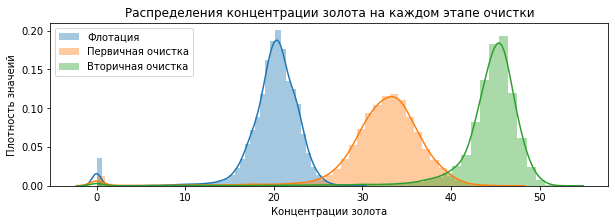

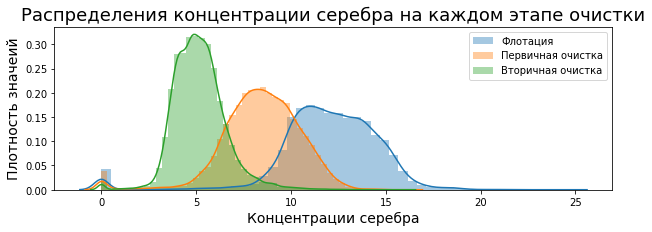

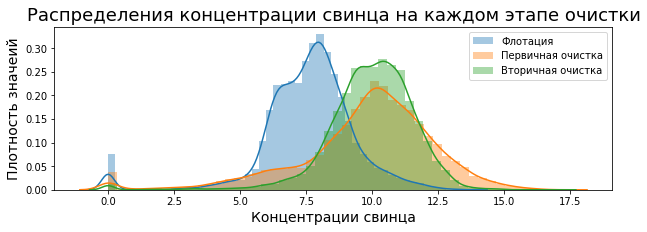

In [ ]:
# Смотрим картинки распределений концентраций.
print()
for metal in metals:
    plt.figure(figsize=(10,3))
    for stage in stages:
        ax = sns.distplot(df_full[stage[0] + metal[0]], 
                          label=stage[1])
        plt.legend()
        _ = ax.set(xlabel='Концeнтрации ' + metal[1], 
                   ylabel='Плотность значеий',
                   title='Распределения концентрации ' + metal[1] + ' на каждом этапе очистки')
    plt.rc('axes', titlesize=18)
    plt.rc('axes', labelsize=14)
    plt.show()

#### Содержание металлов на каждом этапе обработки

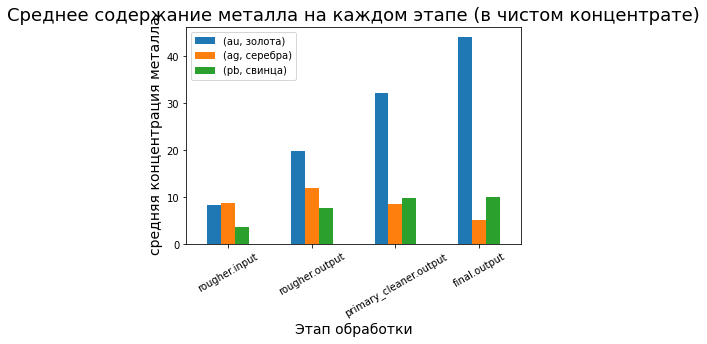

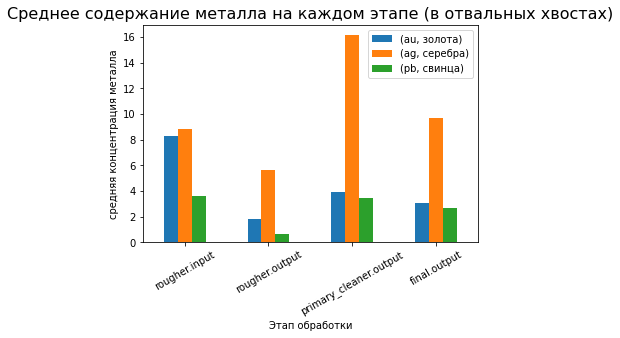

In [ ]:
print_bar_metal(df_full)

#### Вывод

    - Концентрация золота повышается с каждым этапом обработки, что и является основной целью процесса.
    - Концентрация серебра понижается с каждым этапом обработки.
    - Концентрация свинца повышается при первичной очистке и не изменяется при вторичной.
    - Интересное содержание металов в отвальных хвостах. Его на выходе чуть больше чем в начале, а после первичной очистки, так и в 2 раза больше исходного.
    

### Распределения размеров гранул сырья на обучающей и тестовой выборках

Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

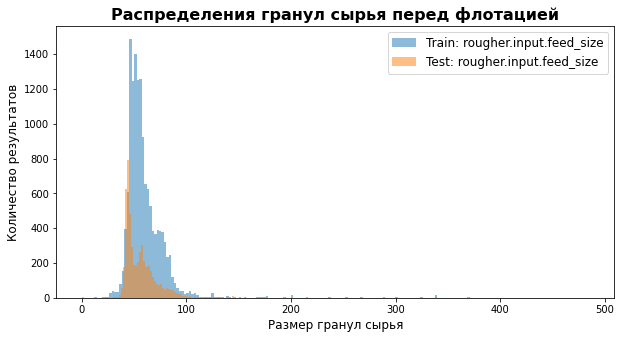

In [ ]:
print()
plt.figure(figsize=[10,5])
plt.hist(df_train['rougher.input.feed_size'], 
                    bins=200, 
                    label = 'Train: rougher.input.feed_size', 
                    alpha=.5)
plt.hist(df_test['rougher.input.feed_size'], 
                    bins=200, 
                    label = 'Test: rougher.input.feed_size', 
                    alpha=.5)
plt.xlabel("Размер гранул сырья", fontsize=12)
plt.ylabel("Количество результатов", fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.title("Распределения гранул сырья перед флотацией", fontsize=16, fontweight='bold')
plt.show()

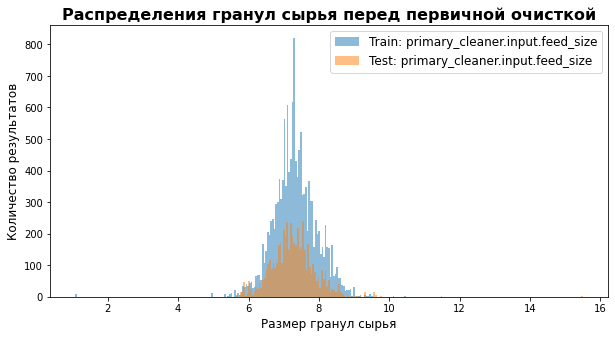

In [ ]:
print()
plt.figure(figsize=[10,5])
plt.hist(df_train['primary_cleaner.input.feed_size'], 
         bins=200, 
         label = 'Train: primary_cleaner.input.feed_size', 
         alpha=.5)
plt.hist(df_test['primary_cleaner.input.feed_size'], 
         bins=200, 
         label = 'Test: primary_cleaner.input.feed_size', 
         alpha=.5)
plt.xlabel("Размер гранул сырья", fontsize=12)
plt.ylabel("Количество результатов", fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.title("Распределения гранул сырья перед первичной очисткой", fontsize=16, fontweight='bold')
plt.show()

#### Вывод

Распределения размеров гранул сырья до флотации и до первичной очистки в обучающей и тестовой выбрке не сильно отличаются друг от друга. Оценка модели должна получиться правильной.

### Суммарная концентрация всех веществ

Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [ ]:
# Посчитаем финальные концентрации

final_output_concentrate_sum = (df_full['final.output.concentrate_au'] + 
                                df_full['final.output.concentrate_ag'] + 
                                df_full['final.output.concentrate_pb'] +
                                df_full['final.output.concentrate_sol'])
primary_cleaner_output_concentrate_sum = (df_full['primary_cleaner.output.concentrate_au'] + 
                                          df_full['primary_cleaner.output.concentrate_ag'] + 
                                          df_full['primary_cleaner.output.concentrate_pb'] +
                                          df_full['primary_cleaner.output.concentrate_sol'])
rougher_output_concentrate_sum = (df_full['rougher.output.concentrate_au'] + 
                                  df_full['rougher.output.concentrate_ag'] + 
                                  df_full['rougher.output.concentrate_pb'] +
                                  df_full['rougher.output.concentrate_sol'])

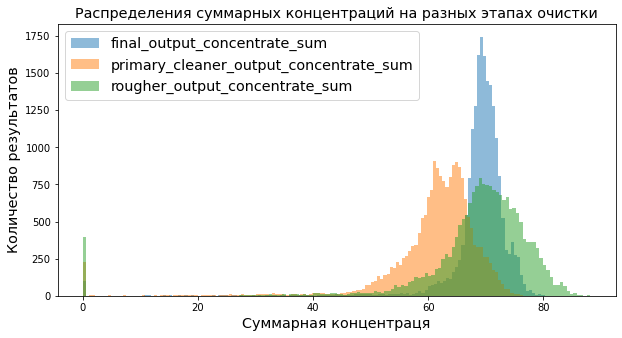

In [ ]:
plt.figure(figsize=[10,5])
plt.hist(final_output_concentrate_sum, 
         bins=150, 
         label = 'final_output_concentrate_sum', 
         alpha=.5)
plt.hist(primary_cleaner_output_concentrate_sum, 
         bins=150, 
         label = 'primary_cleaner_output_concentrate_sum', 
         alpha=.5)
plt.hist(rougher_output_concentrate_sum, 
         bins=150, 
         label = 'rougher_output_concentrate_sum', 
         alpha=.5)
plt.xlabel("Суммарная концентраця", fontsize='x-large')
plt.ylabel("Количество результатов", fontsize='x-large')
plt.legend(loc='upper left', fontsize='x-large')
plt.title("Распределения суммарных концентраций на разных этапах очистки", fontsize='x-large')
plt.show()

#### Вывод

Суммарная концентрация всех веществ меньше после первичной очистки по сравнению с финальной и после флотации.

## Модель

In [ ]:
# Удаляем из df_train то, чего в  df_test не будет. Количество признаков должно быть одинаковым.
df_train_opt = df_train[df_test.columns]
# Лишнее удалили. Восстанавливаем целевые признаки в df_train
df_train_opt['final.output.recovery'] = df_train['final.output.recovery']
df_train_opt['rougher.output.recovery'] = df_train['rougher.output.recovery']
gr.column_differences(df_train_opt, df_test)

========== Отличающиеся столбцы ==========

1. final.output.recovery
2. rougher.output.recovery

Количество столбцов в df1: 54
Количество столбцов в df2: 52
Общее количество отличающихся столбцов:  2


### sMAPE

Напишите функцию для вычисления итоговой sMAPE.

In [ ]:
# см. раздел "Функции"

### Модели

Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

In [ ]:
# Разобъем данные на признаки и целевой признак.

features_rougher = df_train_opt.drop(['rougher.output.recovery', 
                                      'final.output.recovery'], 
                                       axis=1)            # Признаки после флотации
features_final = features_rougher                         # Признаки после вторичной очистки
target_rougher = df_train_opt['rougher.output.recovery']  # Целевой признак после флотации
target_final=df_train_opt['final.output.recovery']        # Целевой признак после вторичной очистки

Возьмем для анализа 3 модели:

    - Линейная регрессия, 
    - Решающее дерево, 
    - Случайный лес
и посмотрим у какой модели получется лучше показатель итогового sMAPE.

In [ ]:
# Укажем какие параметры будем подбирать для GridSearchCV

state = RandomState(1980)

pipe = Pipeline([
    ('model', RandomForestRegressor(n_estimators=10, random_state=state))
])

params = [
            {
                'imp__strategy': ['mean', 'median'],
                'model': [LinearRegression()]
            }, {
                'model': [DecisionTreeRegressor(random_state=state)],
                'model__max_depth': [35],
            }, {
                'imp__strategy': ['mean', 'median'],
                'model': [RandomForestRegressor(n_estimators=10, random_state=state)],
                'model__max_features': np.linspace(0.1, 1, 10)
        }
]

#### Линейная регрессия

In [ ]:
%%time
# Wall time: 20 s

lr_rougher = LinearRegression()
lr_final = LinearRegression()
lr_params = {'normalize':[True,False],
             'copy_X':[True, False]}
final_smape(lr_rougher, lr_final, 
            features_rougher, target_rougher, 
            features_final, target_final, 
            lr_params)


sMAPE rougher: -12.80%
Лучшие параметры rougher: {'copy_X': True, 'normalize': True}

sMAPE final: -12.25%
Лучшие параметры final: {'copy_X': True, 'normalize': True}

Итоговое sMAPE: -12.38%

CPU times: user 5.64 s, sys: 6.61 s, total: 12.3 s
Wall time: 12.3 s


#### Решающее дерево

In [ ]:
%%time
# Wall time: 4min 46s

dtr_rougher = DecisionTreeRegressor(random_state=1980)
dtr_final = DecisionTreeRegressor(random_state=1980)
dtr_params= {'max_depth': range(1,35)}  # проверялось до 100
final_smape(dtr_rougher, dtr_final, 
            features_rougher, target_rougher, 
            features_final, target_final, 
            dtr_params)


sMAPE rougher: -12.46%
Лучшие параметры rougher: {'max_depth': 1}

sMAPE final: -11.27%
Лучшие параметры final: {'max_depth': 5}

Итоговое sMAPE: -11.57%

CPU times: user 3min 39s, sys: 443 ms, total: 3min 39s
Wall time: 3min 43s


#### Случайный лес

In [ ]:
%%time
# Wall time: 3min 46s

rfr_rougher = RandomForestRegressor(random_state=1980)
rfr_final = RandomForestRegressor(random_state=1980)
rfr_params = {'max_depth': range(1,11),    # проверялось до 20, параметры улучшаются, но побережем время проверяющего
                'n_estimators': range(1,5)}  # проверялось до 5
final_smape(rfr_rougher, rfr_final, 
            features_rougher, target_rougher, 
            features_final, target_final, 
            rfr_params)


sMAPE rougher: -13.19%
Лучшие параметры rougher: {'max_depth': 2, 'n_estimators': 1}

sMAPE final: -16.20%
Лучшие параметры final: {'max_depth': 7, 'n_estimators': 1}

Итоговое sMAPE: -15.45%

CPU times: user 2min 56s, sys: 252 ms, total: 2min 56s
Wall time: 2min 56s


#### Сводная таблица с результатами

In [ ]:
# Все данные в одну табличку
table = {'Модель': ['Линейная регрессия', 'Решающее дерево','Случайный лес'], 
        'Итоговое sMAPE': [-12.38, 
                           -11.57, 
                           -15.45],
        'Лучшие параметры': ['copy_X: True; normalize: True', 
                           'max_depth: 3', 
                           'max_depth: 2; n_estimators: 3']}
table = pd.DataFrame.from_dict(table)
display(table)

,Модель,Итоговое sMAPE,Лучшие параметры
0,Линейная регрессия,-12.38000,copy_X: True; normalize: True
1,Решающее дерево,-11.57000,max_depth: 3
2,Случайный лес,-15.45000,max_depth: 2; n_estimators: 3


Лучшее значение sMAPЕ оказалось у Модели Случайный лес = -15.45%. Эту модель и будем использовать для теста с параметром "max_depth: 30" для этапа final

#### Тестирование модели

In [ ]:
# Из df_full возьмем данные для целевого признака, т.к. их не было в тестовой выборке.
target_rougher_test = df_full.loc[df_test.index,'rougher.output.recovery']
target_final_test = df_full.loc[df_test.index,'final.output.recovery']

# Признаками для каждого этапа
features_rougher_test = df_test.loc[target_rougher_test.index]  # признаки для этапа rougher
features_final_test= df_test.loc[target_final_test.index]   # признаки для этапа final

In [ ]:
dtr_rougher_test = RandomForestRegressor(random_state=1980, 
                                         n_estimators=3, 
                                         max_depth=2)
dtr_rougher_test.fit(features_rougher, 
                     target_rougher)
predictions_rougher_test = dtr_rougher_test.predict(features_rougher_test)
smape_rougher_test = smape(target_rougher_test, predictions_rougher_test)


dtr_final_test = RandomForestRegressor(random_state=1980, 
                                       n_estimators=3, 
                                       max_depth=2)
dtr_final_test.fit(features_final,
                   target_final)
predictions_final_test = dtr_final_test.predict(features_rougher_test)
smape_final_test = smape(target_rougher_test, predictions_rougher_test)


smape_final_test = 0.25*smape_rougher_test + 0.75*smape_final_test  


print('\nsMAPE rougher: {:.2f}%'. format(smape_rougher_test))
print('\nsMAPE final: {:.2f}%'. format(smape_final_test))
print ('\nИтоговое sMAPE: {:.2f}%\n'. format(smape_final_test))


sMAPE rougher: -14.10%

sMAPE final: -14.10%

Итоговое sMAPE: -14.10%



#### Проверка модели на адекватность

In [ ]:
dummy = DummyRegressor(strategy='median')

dummy.fit(features_rougher, target_rougher)
predictions_rougher_test = dummy.predict(features_rougher_test)
smape_rougher_test = smape(target_rougher_test, predictions_rougher_test)

dummy.fit(features_final, target_final)
predictions_final_test = dummy.predict(features_final_test)
smape_final_test = smape(target_final_test, predictions_final_test)

smape_dummy = 0.25*smape_rougher_test + 0.75*smape_final_test
print('sMAPE dummy-модели на тестовой выборке: ', smape_dummy)

sMAPE dummy-модели на тестовой выборке:  -9.479919198122863


Результат модели "Решающее дерево" получился лучше, чем у DummyRegressor. Значит построенная модель адекватна.

#### Вывод

С помощью метрики качества sMAPE и методов кросс-валидации лучшей моделью оказалась "Случайный лес". Ее sMAPE самое низкое и равно -15.45%.

## Итоговый вывод

Прототип модели машинного обучения был получен. Лучшей оказалась модель "Случайный лес".

Модель предсказывает коэффициент восстановления золота из золотосодержащей руды с погрешностью (симметричное среднее абсолютное процентное отклонение) -15.45% на тренировочных данных и -14.10% на тестовых.

Цели проекта достигнуты:

    - Данные подготовлены.
    - Проведен исследовательский анализ данных:
        - Концентрация золота повышается с каждым этапом обработки.
        - Концентрация серебра понижается с каждым этапом обработки.
        - Концентрация свинца повышается при первичной очистке и не изменяется при вторичной.
        - Интересное содержание металов в отвальных хвостах.
        - Распределения размеров гранул сырья до флотации и до первичной очистки в обучающей и тестовой выбрке не сильно отличаются друг от друга.
        - Суммарная концентрация всех веществ меньше после первичной очистки по сравнению с финальной и после флотации.
    - Построены и обучены 3 модели предсказания. Среди которых выбрана "Решающее дерево".